# Shallow dense AE for MNIST

In [79]:
from keras.backend import clear_session
from keras.layers import Input, Dense
from keras.models import Model
clear_session()

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [80]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [81]:
# Create a placeholder for an encoded 32 dim input
encoded_input = Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder       = Model(encoded_input, decoder_layer(encoded_input))

decoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


In [82]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [83]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [84]:
x_train = x_train.astype('float32') / 255
x_test  =  x_test.astype('float32') / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test  =  x_test.reshape((len(x_test),  np.prod(x_test.shape[1:])))

In [85]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [94]:
hist = autoencoder.fit(x_train, x_train, epochs=100, batch_size=256, shuffle=True, validation_data=(x_test,x_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.1423 - val_loss: 0.1325
Epoch 2/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.1277 - val_loss: 0.1206
Epoch 3/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.1175 - val_loss: 0.1121
Epoch 4/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.1103 - val_loss: 0.1065
Epoch 5/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.1054 - val_loss: 0.1021
Epoch 6/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.1019 - val_loss: 0.0993
Epoch 7/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.0995 - val_loss: 0.0973
Epoch 8/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.0979 - val_loss: 0.0960
Epoch 9/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.0967 - val_loss: 0.0

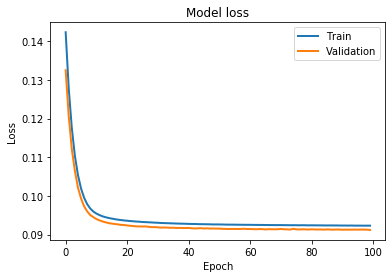

In [95]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], linewidth=2, label='Train')
plt.plot(hist.history['val_loss'], linewidth=2, label='Validation')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [96]:
# Encode and decode some digits
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

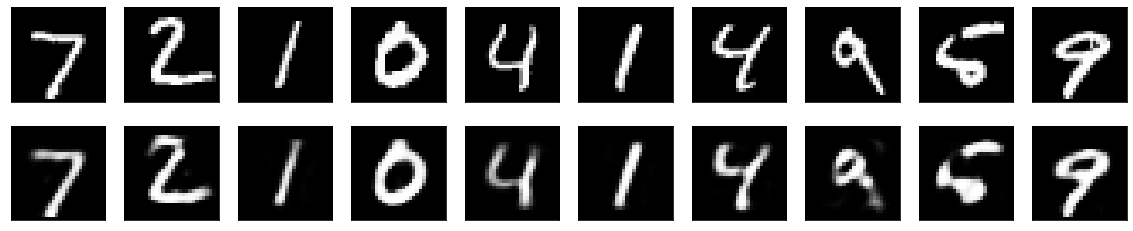

In [97]:
n=10
plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()